# 简介

假设我们有n件物品，分别编号为1, 2...n。其中编号为i的物品价值为vi，它的重量为wi。为了简化问题，假定价值和重量都是整数值。现在，假设我们有一个背包，它能够承载的重量是W。现在，我们希望往包里装这些物品，使得包里装的物品价值最大化，那么我们该如何来选择装的东西呢？问题结构如下图所示：
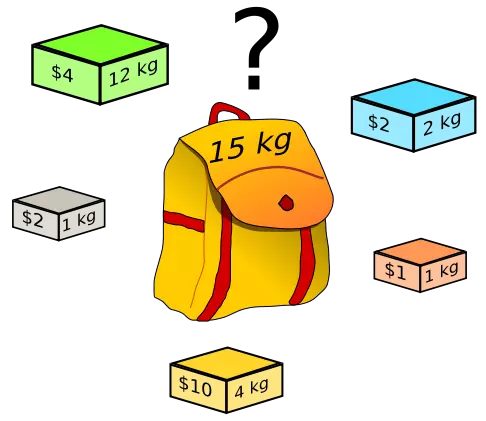、

这个问题其实根据不同的情况可以归结为不同的解决方法。假定我们这里选取的物品每个都是独立的，不能选取部分。也就是说我们要么选取某个物品，要么不能选取，不能只选取一个物品的一部分。这种情况，我们称之为0-1背包问题。而如果我们可以使用部分的物品的话，这个问题则成为部分背包(fractional knapsack)问题。这里我们只考虑0-1背包问题。



# 动态规划思路

我们需要选择n个元素中的若干个来形成最优解，假定为k个。那么对于这k个元素a1, a2, ...ak来说，它们组成的物品组合必然满足总重量<=背包重量限制，而且它们的价值必然是最大的。因为它们是我们假定的最优选择嘛，肯定价值应该是最大的。假定ak是我们按照前面顺序放入的最后一个物品。它的重量为wk，它的价值为vk。既然我们前面选择的这k个元素构成了最优选择，如果我们把这个ak物品拿走，对应于k-1个物品来说，它们所涵盖的重量范围为0-(W-wk)。假定W为背包允许承重的量。假定最终的价值是V，剩下的物品所构成的价值为V-vk。这剩下的k-1个元素是不是构成了一个这种W-wk的最优解呢？

我们可以用反证法来推导。假定拿走ak这个物品后，剩下的这些物品没有构成W-wk重量范围的最佳价值选择。那么我们肯定有另外k-1个元素，他们在W-wk重量范围内构成的价值更大。如果这样的话，我们用这k-1个物品再加上第k个，他们构成的最终W重量范围内的价值就是最优的。这岂不是和我们前面假设的k个元素构成最佳矛盾了吗？所以我们可以肯定，在这k个元素里拿掉最后那个元素，前面剩下的元素依然构成一个最佳解。

假定我们定义一个函数c[i, w]表示到第i个元素为止，在限制总重量为w的情况下我们所能选择到的最优解。那么这个最优解要么包含有i这个物品，要么不包含，肯定是这两种情况中的一种。

    如果我们选择了第i个物品，那么实际上这个最优解是c[i - 1, w-wi] + vi。

    如果我们没有选择第i个物品，这个最优解是c[i-1, w]。

这样，实际上对于到底要不要取第i个物品，我们只要比较这两种情况，哪个的结果值更大不就是最优的么？




这里有一点值得注意，这里的wi指的是第i个物品的重量，而不是到第i个物品时的总重量。
另外，对于初始的情况呢？很明显c[0, w]里不管w是多少，肯定为0。因为它表示我们一个物品都不选择的情况。c[i, 0]也一样，当我们总重量限制为0时，肯定价值为0。
这样，基于我们前面讨论的这3个部分，我们可以得到一个如下的递推公式：

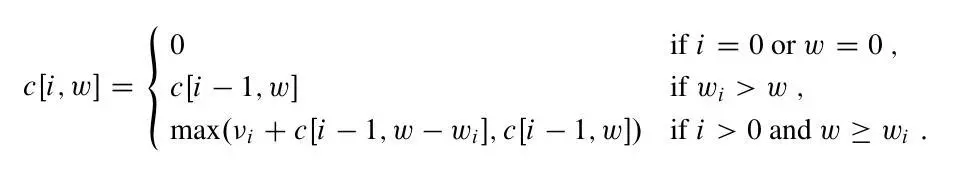

我们再来考虑一下具体实现的细节。这一组物品分别有价值和重量，我们可以定义两个数组int[] v, int[] w。v[i]表示第i个物品的价值，w[i]表示第i个物品的重量。

为了表示c[i, w]，我们可以使用一个int[i][w]的矩阵。其中i的最大值为物品的数量，而w表示最大的重量限制。按照前面的递推关系，c[i][0]和c[0][w]都是0。而我们所要求的最终结果是c[n][w]。所以我们实际中创建的矩阵是(n + 1) x (w + 1)的规格。

# python代码实现

In [2]:
import numpy as np

def solve(vlist,wlist,totalWeight,totalLength):
    resArr = np.zeros((totalLength+1,totalWeight+1),dtype=np.int32)
    for i in range(1,totalLength+1):
        for j in range(1,totalWeight+1):
            if wlist[i] <= j:
                resArr[i,j] = max(resArr[i-1,j-wlist[i]]+vlist[i],resArr[i-1,j])
            else:
                resArr[i,j] = resArr[i-1,j]
    return resArr[-1,-1]

if __name__ == '__main__':
    v = [0,60,100,120]
    w = [0,10,20,30]
    weight = 50
    n = 3
    result = solve(v,w,weight,n)
    print(result)


220


#### 不用numpy

In [5]:
def solve(vlist,wlist,totalWeight,totalLength):
    dp = [[0 for k in range(totalWeight+1)] for h in range(totalLength+1)]
    for i in range(totalLength+1):
        for j in range(totalWeight+1):
            if i!=0 and j!=0:
                if w[i] <= j:
                    dp[i][j] = max(dp[i-1][j-wlist[i]]+vlist[i], dp[i-1][j])
                else:
                    dp[i][j] = dp[i-1][j]
    return dp

if __name__ == '__main__':
    v = [0,60,100,120]
    w = [0,10,20,30]
    weight = 50
    n = 3
    result = solve(v,w,weight,n)
    print(result[-1][-1])



220


## 复杂度优化

以上方法的时间和空间复杂度均为 O(N*W)，其中时间复杂度基本已经不能再优 化了，但空间复杂度却可以优化到 O(W)。

先考虑上面讲的基本思路如何实现，肯定是有一个主循环 i=1..N，每次算出来 二维数组 f[i][0..W]的所有值。

那么，如果只用一个数组 f[0..W]，能不能保证 第 i 次循环结束后 f[w]中表示的就是我们定义的状态 f[i][w]呢?

f[i][w]是由 f[i-1][w]和 f[i-1][w-c[i]]两个子问题递推而来，能否保证在推 f[i][w]时(也 即在第 i 次主循环中推 f[w]时)能够得到 f[i-1][w]和 f[i-1][w-w[i]]的值呢? 事实上，这要求在每次主循环中我们以 v=V..0 的顺序推 f[w]，这样才能保证推 f[v]时 f[v-w[i]]保存的是状态 f[i-1][w-w[i]]的值。改进后的代码如下：



In [9]:
def solve2(vlist,wlist,totalWeight,totalLength):
    resArr = np.zeros((totalWeight)+1,dtype=np.int32)
    for i in range(1,totalLength+1):
        for j in range(totalWeight,0,-1):
            if wlist[i] <= j:
                resArr[j] = max(resArr[j],resArr[j-wlist[i]]+vlist[i])
    return resArr

if __name__ == '__main__':
    v = [0,60,100,120]
    w = [0,10,20,30]
    weight = 50
    n = 3
    result = solve2(v,w,weight,n)
    print(result)



[  0   0   0   0   0   0   0   0   0   0  60  60  60  60  60  60  60  60
  60  60 100 100 100 100 100 100 100 100 100 100 160 160 160 160 160 160
 160 160 160 160 180 180 180 180 180 180 180 180 180 180 220]


我们看到的求最优解的背包问题题目中，事实上有两种不太相同的问法。有的题 目要求“恰好装满背包”时的最优解，有的题目则并没有要求必须把背包装满。 一种区别这两种问法的实现方法是在初始化的时候有所不同。

如果是第一种问法，要求恰好装满背包，那么在初始化时除了 f[0]为 0 其它 f[1..W]均设为-∞，这样就可以保证最终得到的 f[N]是一种恰好装满背包的最 优解。
如果并没有要求必须把背包装满，而是只希望价格尽量大，初始化时应该将 f[0..W]全部设为 0。

为什么呢?可以这样理解:初始化的 f 数组事实上就是在没有任何物品可以放入 背包时的合法状态。如果要求背包恰好装满，那么此时只有容量为 0 的背包可能 被价值为 0 的 nothing“恰好装满”，其它容量的背包均没有合法的解，属于未 定义的状态，它们的值就都应该是-∞了。如果背包并非必须被装满，那么任何 容量的背包都有一个合法解“什么都不装”，这个解的价值为 0，所以初始时状 态的值也就全部为 0 了。\

这个小技巧完全可以推广到其它类型的背包问题，后面也就不再对进行状态转移 之前的初始化进行讲解。
